## Building an Image Classifier for FashionMNIST data And TensorBoard Demo

**MLPs are also known as SNNs,FNNs and FFNNs**

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

### Get the Data.... 

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set or mentioning the `validation_ratio` argument in the `fit()` method.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

And the class of 1025th image in train set is:

In [4]:
class_names[y_train[1024]]

'Trouser'

Let us display and see the image for that:
You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

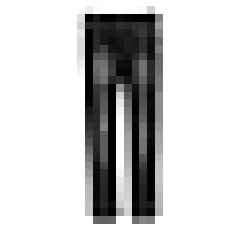

In [5]:
plt.imshow(X_train[1024], cmap="binary")
plt.axis('off')
plt.show()

### Build A Model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

### Compiling the model

After a model is created you must call its `compile()`method to specify the **loss function** and **optimizer** to use.

Optionally, you can specify a ***list*** of of extra metrics to compute during training and evaluation like this:

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### TensorBoard

In [8]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [9]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2019_11_05-16_09_17'

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_kera_model_03.h5", save_best_only=True)

In [12]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [16]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir,histogram_freq=5)


In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 85us/sample - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3136 - val_accuracy: 0.1003
Epoch 2/30
54000/54000 [==============================] - 5s 86us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3137 - val_accuracy: 0.0942
Epoch 3/30
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3137 - val_accuracy: 0.0925
Epoch 4/30
54000/54000 [==============================] - 4s 83us/sample - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3137 - val_accuracy: 0.0942
Epoch 5/30
54000/54000 [==============================] - 4s 81us/sample - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3138 - val_accuracy: 0.0942
Epoch 6/30
54000/54000 [==============================] - 4s 82us/sample - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3137 - val_accuracy: 0.0942
Epoch 7/30
54000/54000 [==============================] -

In [18]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6007

Reusing TensorBoard on port 6007 (pid 9696), started 0:24:48 ago. (Use '!kill 9696' to kill it.)